In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
import seaborn as sns

In [39]:
df = pd.read_csv('writing_center.csv')

In [78]:
df.iloc[:,:15]

,Student_ID,Term,Section_ID,Instructor_ID,Main_CourseID,Gender,Age,Ethnicity,FirstGen,Military,FosterYouth,DSPS,FinAid,Units_Attempted_Beg_Of_Term,GPA_Beg_Of_Term
0,1,Year 1 Fall,112,9569,ENG 1,Male,21,Mixed Ethnicity,0,0,0,0,1,42.0,2.761905
1,2,Year 1 Fall,89,1515,ENG 1,Female,24,Mixed Ethnicity,0,0,0,0,0,93.5,2.374332
2,3,Year 1 Fall,99,2357,ENG 1,Female,24,Hispanic / Latino,0,0,0,0,1,42.0,3.309524
3,9,Year 1 Fall,102,1672,ENG 1,Male,24,"White, Non-Hispanic",1,0,0,0,0,49.0,2.020408
4,11,Year 1 Fall,102,1672,ENG 1,Male,26,Asian,1,0,0,0,0,25.0,1.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,4723,Year 3 Summer,19,2029,ENG 1,Male,19,Mixed Ethnicity,1,0,0,0,0,0.0,0.000000
4723,4724,Year 3 Summer,20,7882,ENG 1,Female,18,Asian,0,0,0,0,0,0.0,0.000000
4724,4725,Year 3 Summer,17,1612,ENG 1,Female,17,"White, Non-Hispanic",0,0,0,0,1,0.0,0.000000
4725,4726,Year 3 Summer,13,2038,ENG 1,Female,23,Asian,0,0,0,0,1,0.0,0.000000


In [74]:
df.iloc[:, 15:29]

,TermUnitsAttempted,K12_Student,First_Time_College_Student,Nonresident_Tuition_Exempt,International,Nonresident,WR_Center,Main_Course_SuccessFlag,Main_Course_GradePoints,HS_GPA,Online,N_Center_Visits,Center_Attendance_Hours,N_Conf
0,10.0,0,0,0,0,0,0,1,2,NaN,1,NaN,NaN,NaN
1,10.0,0,0,0,0,0,1,0,1,NaN,0,17.0,18.351944,1.0
2,10.0,0,0,1,0,0,0,1,4,2.113,0,NaN,NaN,NaN
3,10.0,0,0,0,0,0,0,1,3,2.249,0,NaN,NaN,NaN
4,7.0,0,0,0,0,0,0,1,2,3.100,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,9.0,0,0,0,0,0,1,1,3,3.600,0,21.0,18.711362,4.0
4723,7.0,0,1,0,0,0,0,1,4,3.870,1,NaN,NaN,NaN
4724,7.0,0,1,0,0,0,1,1,3,3.270,0,30.0,49.327298,6.0
4725,9.0,0,0,0,0,0,1,1,4,2.950,0,17.0,23.180048,3.0


## Sucess is predicted by instructor

In [111]:
preprocessor = ColumnTransformer(
    transformers=[
        ('instructor_encoder', OneHotEncoder(), ['Instructor_ID'])
    ],
    remainder='passthrough'  # Keep any remaining columns
)

# Create a pipeline with the column transformer and logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model on the entire dataset
model.fit(df[['Instructor_ID']], df['Main_Course_SuccessFlag'])

# Print the coefficient estimates
coefficients = model.named_steps['classifier'].coef_
intercept = model.named_steps['classifier'].intercept_


c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [124]:
coefficients

array([[-0.44567196,  0.18802894, -0.79963433,  0.8831219 , -0.21536868,
        -0.166976  , -0.53730373, -0.3702888 ,  0.072351  , -0.36210298,
         1.13224251,  0.07320354,  1.14514066,  0.11789778, -0.50389048,
         0.2464998 ,  0.73696489,  0.44910461, -0.76170295, -0.05143732,
        -0.11732206,  0.27931339, -0.73971838,  0.3219522 , -0.3696892 ,
         0.03831986, -0.03500052, -0.63250146,  0.58924605, -0.37697757,
         0.21082277,  0.94077637,  0.55602516, -0.42376806, -0.09700511,
        -0.30237958, -0.93506248, -0.19416253,  0.75255666, -0.07310972,
        -0.45585551, -0.34850021, -0.49091201, -1.33266339, -0.68664838,
         0.73280223, -0.53419822,  0.44726869,  0.70941221,  0.19018852,
         1.03959668,  0.52111857]])

## Success predicted by writing center is different for each instructor

In [275]:
def model_coefs(features):

    coefficients = []
    errors = []
    sizes = []

    # Loop through unique instructor IDs
    for ID in df['Instructor_ID'].unique().tolist():
        df_in = df[df['Instructor_ID'] == ID]
        sizes.append(df_in.shape[0])

        # Create a logistic regression model
        model = LogisticRegression()

        model.fit(df_in[features], df_in['Main_Course_SuccessFlag'])

        # Predict the probabilities
        probabilities = model.predict_proba(df_in[features])

        # Calculate log loss
        current_log_loss = log_loss(df_in['Main_Course_SuccessFlag'], probabilities)

        # Store coefficients and errors
        coefficients.append(model.coef_[0][0])
        errors.append(current_log_loss)
        
    return coefficients, errors, sizes

In [241]:
def bootstrap(data):

    #bootstrap coefficients
    B = 10000

    bootstrapped_means = np.zeros(B)
    bootstrapped_std = np.zeros(B)

    # Perform bootstrapping
    for i in range(B):
        # Generate a bootstrap sample by sampling with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        
        # Calculate the mean of the bootstrap sample
        bootstrapped_means[i] = np.mean(bootstrap_sample)
        bootstrapped_std[i] = np.std(bootstrap_sample)
        
    return bootstrapped_means, bootstrapped_std

In [276]:
coefficients_reg, errors_reg, size_reg = model_coefs(['WR_Center'])
coefficients_cov, errors_cov, size_cov = model_coefs(['WR_Center', 'Age', 'Military', 'FirstGen', 'FosterYouth', 'DSPS', 'FinAid', 'K12_Student', 'First_Time_College_Student', 'International', 'Nonresident'])

c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

0.18597458960566976
0.19916552313074118


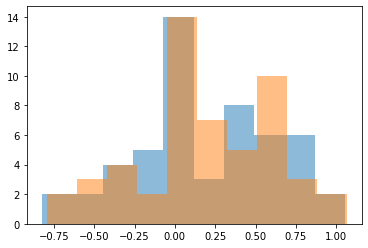

In [259]:
plt.hist(coefficients_reg, alpha=0.5)
plt.hist(coefficients_cov, alpha=0.5)
print(np.mean(coefficients_reg))
print(np.mean(coefficients_cov))

In [249]:
bootstrap_means_reg, bootstrap_std_reg = bootstrap(coefficients_reg)
bootstrap_means_cov, bootstrap_std_cov =  bootstrap(coefficients_cov)

Text(0.5, 1.0, 'Bootstrap Means of coefficient of score ~ writing_center')

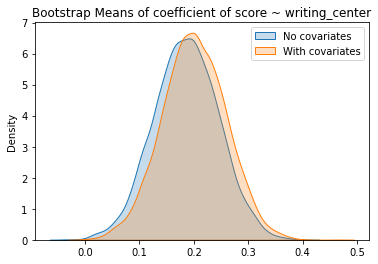

In [264]:
sns.kdeplot(bootstrap_means_reg, label='No covariates', fill=True)
sns.kdeplot(bootstrap_means_cov, label='With covariates', fill=True)
plt.legend()
plt.title('Bootstrap Means of coefficient of score ~ writing_center, instructor no pooling')

Text(0.5, 1.0, 'Bootstrap STD of coefficient of score ~ writing_center, instructor no pooling')

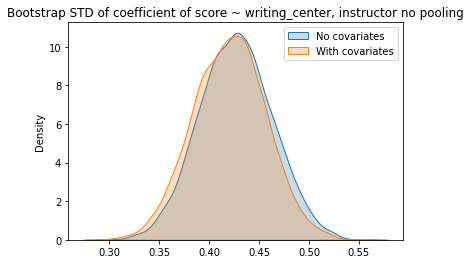

In [266]:
sns.kdeplot(bootstrap_std_reg, label='No covariates', fill=True)
sns.kdeplot(bootstrap_std_cov, label='With covariates', fill=True)
plt.legend()
plt.title('Bootstrap STD of coefficient of score ~ writing_center, instructor no pooling')

(array([ 4.,  2.,  2.,  6.,  4.,  6.,  6., 10.,  8.,  4.]),
 array([0.19473146, 0.23971737, 0.28470327, 0.32968918, 0.37467508,
        0.41966099, 0.46464689, 0.5096328 , 0.5546187 , 0.59960461,
        0.64459051]),
 <BarContainer object of 10 artists>)

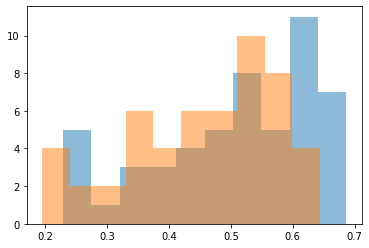

In [267]:
plt.hist(errors_reg, alpha=0.5)
plt.hist(errors_cov, alpha=0.5)

## Gender

In [285]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

coefficients_gen = []
errors_gen = []
sizes_gen = []

# Loop through unique instructor IDs
for ID in df['Instructor_ID'].unique().tolist():
    df_in = df[df['Instructor_ID'] == ID]
    sizes_gen.append(df_in.shape[0])

    # Create a logistic regression model
    model = LogisticRegression()

    model.fit(df_in['Gender'].array.reshape(-1,1), df_in['Main_Course_SuccessFlag'])

    # Predict the probabilities
    probabilities = model.predict_proba(df_in['Gender'].array.reshape(-1,1))

    # Calculate log loss
    current_log_loss = log_loss(df_in['Main_Course_SuccessFlag'], probabilities)

    # Store coefficients and errors
    coefficients_gen.append(model.coef_[0][0])
    errors_gen.append(current_log_loss)

c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

(array([ 1.,  7.,  3., 12., 10., 13.,  4.,  0.,  0.,  2.]),
 array([-1.35351612, -1.08241059, -0.81130506, -0.54019952, -0.26909399,
         0.00201155,  0.27311708,  0.54422262,  0.81532815,  1.08643368,
         1.35753922]),
 <BarContainer object of 10 artists>)

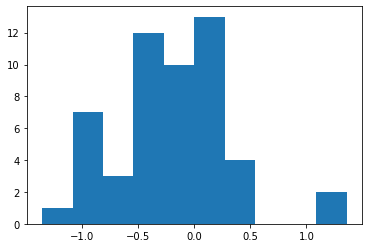

In [288]:
plt.hist(coefficients_gen)

In [289]:
# Create a logistic regression model
model = LogisticRegression()

model.fit(df['Gender'].array.reshape(-1,1), df['Main_Course_SuccessFlag'])

# Predict the probabilities
probabilities = model.predict_proba(df['Gender'].array.reshape(-1,1))

# Calculate log loss
log_loss_grand = log_loss(df['Main_Course_SuccessFlag'], probabilities)

# Store coefficients and errors
coef_grand = model.coef_[0][0]

c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ah140\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

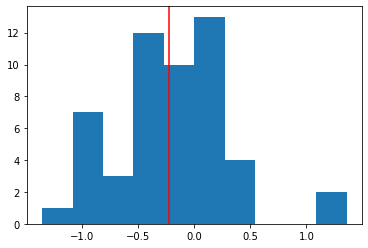

In [294]:
 plt.hist(coefficients_gen)
 plt.axvline(x=coef_grand, color = 'red')

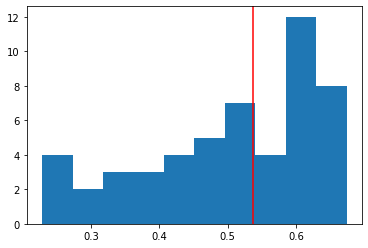

In [296]:
plt.hist(errors_gen)
plt.axvline(x=log_loss_grand, color = 'red')

In [297]:
print('complete pooling loss:', log_loss_grand)
print('no pooling', np.mean(errors_gen))

complete pooling loss: 0.5374431826533933
no pooling 0.5037471142079191
